# Постановка задачи
Требуется построить нейронную сеть для управления поведением персонажа компьютерной игры в зависимости от обстановки окружающей среды. Входные данные представляют собой характеристики обстановки, такие как здоровье персонажа, наличие ножа и пистолета, количество врагов. Целевая переменная определяет действие, которое должен совершить персонаж: уворачиваться, атаковать, прятаться или бежать.

# Описание исходных данных
Исходные данные содержат информацию о различных ситуациях в игре, где персонажу необходимо выбрать оптимальное действие в зависимости от обстановки.

Обучающая и тестовые выборки представлены в виде таблиц:
* здоровье (значения от 0 (плохое) до 2 (среднее))
* имеет нож (1 – имеет, 0 - нет)
* имеет пистолет (1 – имеет, 0 - нет)
* присутствует враг (количество врагов)
* последний столбец показывает принадлежность классу, т.е.
действие
  * уворачиваться
  * атаковать
  * прятаться
  * бежать

Пример: персонаж здоров, имеет пистолет и есть только один
враг, то надо атаковать.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

train_data = pd.read_csv('data_train_lab5.csv')
test_data = pd.read_csv('data_test_lab5.csv')

In [ ]:
X_train = train_data.iloc[:, 0:4]
X_test = test_data.iloc[:, 0:4]
print(X_train)

y_train = train_data.select_dtypes(include=[object])
y_test = test_data.select_dtypes(include=[object])
print(y_train)

y_train.Beh.unique()

    Health  knife  gun  enemies
0        2      0    0        0
1        2      0    0        1
2        2      0    1        1
3        2      0    1        2
4        2      1    0        2
5        2      1    0        1
6        1      0    0        0
7        1      0    0        1
8        1      0    1        1
9        1      0    1        2
10       1      1    0        2
11       1      1    0        1
12       0      0    0        0
13       0      0    0        1
14       0      0    1        1
15       0      0    1        2
16       0      1    0        2
17       0      1    0        1
       Beh
0    dodge
1    dodge
2   attack
3   attack
4     hide
5   attack
6    dodge
7     hide
8   attack
9     hide
10    hide
11    hide
12   dodge
13    hide
14    hide
15     run
16     run
17    hide


array(['dodge', 'attack', 'hide', 'run'], dtype=object)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train_labels2 = y_train.apply(le.fit_transform)
test_labels2 = y_test.apply(le.fit_transform)

print (train_labels2)
print (test_labels2)

    Beh
0     1
1     1
2     0
3     0
4     2
5     0
6     1
7     2
8     0
9     2
10    2
11    2
12    1
13    2
14    2
15    3
16    3
17    2
   Beh
0    0
1    2
2    1
3    2
4    2
5    2
6    3


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, utils

print(tf.__version__)
print(tf.keras.__version__)

from keras.utils import to_categorical

train_labels = to_categorical(train_labels2)
test_labels = to_categorical(test_labels2)

print(train_labels)
print(test_labels)

2.12.0
2.12.0
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


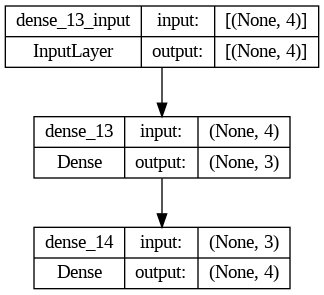

In [ ]:
from keras import models
from keras import layers
from keras import utils

model = models.Sequential()
model.add(layers.Dense(3, activation='relu', input_shape=(4,)))
model.add(layers.Dense(4, activation='softmax'))

from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 3)                 15        
                                                                 
 dense_14 (Dense)            (None, 4)                 16        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


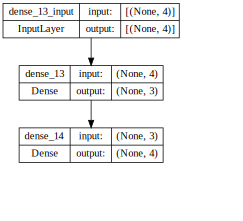

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [ ]:
from keras.optimizers import SGD

opt=SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train, train_labels, validation_data=(X_test,test_labels), epochs=1000, batch_size=1)

Epoch 1/1000
18/18 [==============================] - 0s 10ms/step - loss: 1.3171 - accuracy: 0.4444 - val_loss: 1.1655 - val_accuracy: 0.5714
Epoch 2/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.2039 - accuracy: 0.5000 - val_loss: 1.0623 - val_accuracy: 0.7143
Epoch 3/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.1523 - accuracy: 0.4444 - val_loss: 0.9729 - val_accuracy: 0.5714
Epoch 4/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.1302 - accuracy: 0.6111 - val_loss: 0.9424 - val_accuracy: 0.7143
Epoch 5/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.1456 - accuracy: 0.4444 - val_loss: 0.9044 - val_accuracy: 0.4286
Epoch 6/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.9776 - accuracy: 0.6111 - val_loss: 0.8117 - val_accuracy: 0.5714
Epoch 7/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.9576 - accuracy: 0.6111 - val_loss: 0.7803 - val_accuracy: 0.5714
Epoch

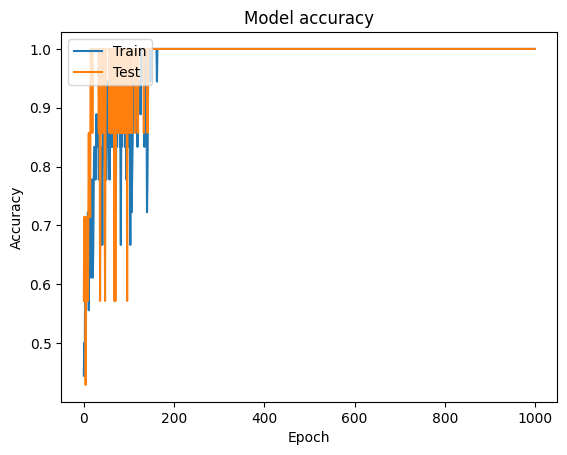

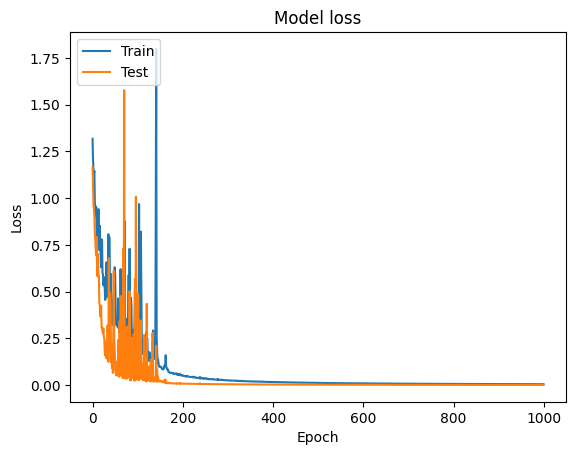

1/1 [==============================] - 0s 18ms/step
--------------------------
| №  | Predict  |  Beh   |
--------------------------
| 1  |    0     |   0    |
--------------------------
| 2  |    2     |   2    |
--------------------------
| 3  |    1     |   1    |
--------------------------
| 4  |    2     |   2    |
--------------------------
| 5  |    2     |   2    |
--------------------------
| 6  |    2     |   2    |
--------------------------
| 7  |    3     |   3    |
--------------------------


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

ynew = np.argmax(model.predict(X_test), axis=-1)
print('-' * 26)
print("|{:^4}|{:^10}|{:^8}|".format('№', 'Predict', 'Beh'))
print('-' * 26)
for i in range(len(ynew)):
    print("|%4s|%10s|%8s|" % (str(i+1).center(4), str(ynew[i]).center(10), (test_labels2.iloc[i]).to_string(index=False).center(8)))
    print('-' * 26)

Благодаря большому количеству эпох данный алгоритм очень точно определяет необходимые действия относительно предположенных.



# Список литературы
1. Лабораторная работа №5. Разработка нейронных сетей для классификации данных. Дубна: Дубна: Университет "Дубна", 2021. https://lms.uni-dubna.ru/pluginfile.php/270546/mod_assign/introattachment/0/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%205.pdf?forcedownload=1

2. Официальная документация Keras (https://keras.io/) - документация библиотеки Keras, где вы найдете подробную информацию о различных слоях, функциях активации, оптимизаторах и других компонентах нейронных сетей.

3. Официальная документация TensorFlow (https://www.tensorflow.org/) - документация библиотеки TensorFlow, на которой базируется Keras. Здесь вы найдете информацию о различных инструментах и возможностях TensorFlow для глубокого обучения.